In [61]:
#data analysis
import numpy as np 
import pandas as pd
from urllib import request

# plotting
%matplotlib inline
import matplotlib.pyplot as plt

#data visualisation
import seaborn as sns 

#working with date
from dateutil.parser import parse
from datetime import date
import calendar
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

#working with distribution
# from scipy import stats
import scipy.stats as st
from scipy.stats import norm

# No-food-waste project

### Abstract
This report contains work with the real dataset provided by the "CODE" university partner "Metronom". "Metronom" is a part of the huge german retailer company "Metro". 
During t...

### Introduction
Initial goal for the report was to find out a way for such a huge retailer company as "Metro" to reduce the food waste. However, during the analyse process, our goal was adapting to the realities of bisiness and possibility to get insider information. Our goal was changed towards explanatory data analysis through visualizations using Python libraries and statistical methods. We hypothesised that we could find relationships between categorical and numerical variables. Is there relationship between stock, shrinkage and sales? Is there the most problematic regarding shrinkage products and could it be adviced to give up on that products? Is there also the most sold product? Which category fresh or ultrafresh takes the main part in total sales, stock, shrinkage? 

In order to achive a goal we worked with different categories of data, exploring our trends of shrinkage, sales and stock by day, category of product.
As a result, we correlation between... Since the data we got was row - cleaning took a big part of the report. 

### Data, materials and Methods
The data is provided by one of the biggest german retail company __["METRO"](https://www.metro.de/)__ . The dataset contains information about products for an department store. Data could not be shared openly due to Non-disclosure agreement

*Time interaval of the data set* -  period berween 1st to 31th of January 2020. 

*German* is a main languige of the data set. Names of the columns were translated for more convinient work.

Keywords:

*Depo* is a B2B shop for small business (HORECA): shops, cafes, restaurants.

*Shrinkage* is a waste of products due to different reasons such as theft, damage, spoilage.

*Freshness* is an attribute of the perceived quality of food.

*Reqired* libraries:
- __[Numpy](https://www.numpy.org/)__ ,
- __[Pandas](https://pandas.pydata.org/)__ ,
- __[SciPy](https://www.scipy.org/)__ ,
- __[SciPy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)__ ,
- __[Seaborn](https://seaborn.pydata.org/)__ ,
- __[Matplotlib](https://matplotlib.org/)__  . 

Since our data was not fitting into any theoretical distributions, we use SciPy fit() method. 

### i. Loading and pre-processing the data

In [2]:
filepath = "./data_metro.csv"
df = pd.read_csv(filepath, encoding = "ISO-8859-1", error_bad_lines=False,low_memory=False, sep="\t")

Current dataset contains 13 columns, most of them are stored as a string format. A few target columns have missing values.
We need to start cleaning the data to make it easier to work.

In [3]:
df.columns

Index(['store_id', 'store_desc', 'CATMAN_BUY_DOMAIN_ID',
       'CATMAN_BUY_DOMAIN_DESC', 'PCG_MAIN_CAT_ID', 'PCG_CAT_ID',
       'PCG_CAT_DESC', 'PCG_SUB_CAT_ID', 'PCG_SUB_CAT_DESC', 'ART_NO',
       'ART_NAME', 'Bv NNEK', 'Bv Stk', 'Bestand Ist NNEK',
       'Bestand Ist Stück', 'WA Stück', 'Umsatz VK Netto', 'date_of_day',
       'DAY_DESC'],
      dtype='object')

Since we have got a row data, column names are not self-explanatory and difficult to work with. Column names have to be renamed into more accurately described ones.

In [4]:
df = df.rename(columns={"CATMAN_BUY_DOMAIN_ID": "purchasing_area_id", 
                   "CATMAN_BUY_DOMAIN_DESC" : "purchasing_area_description", 
                   "PCG_MAIN_CAT_ID" : "main_product_group_id",
                   "PCG_CAT_ID" : "product_group_category_id",
                   "PCG_CAT_DESC" : "product_group_category_description",
                   "PCG_SUB_CAT_ID" : "product_subgroup_category_id",
                   "PCG_SUB_CAT_DESC" : "product_subgroup_category_description",
                            "ART_NO": "article_number",
                            "ART_NAME":"article_name",
                   "Bv NNEK" : "daily_shrinkage_in_euros",
                   "Bv Stk" : "daily_shrinkage_in_pieces",
                   "Bestand Ist NNEK": "daily_stock_in_euros",
                   "Bestand Ist Stück": "daily_stock_in_pieces",
                   "WA Stück": "daily_sales_in_pieces",
                   "Umsatz VK Netto" : "daily_sales_in_euros"
                   
                  })
df.sample(5)

,store_id,store_desc,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,article_number,article_name,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,DAY_DESC
329445,579,LIEFERDEPOT BERLIN,63,ACM FLEISCH,970,20,Rindfleisch frisch,56,Rind Roastbeef,539540,FAERSEN-ROASTBEEF M. KN.,NaN,NaN,0.0,0.0,NaN,NaN,22.01.20,22.01.20 Mit
619779,579,LIEFERDEPOT BERLIN,66,ACM BLUMEN,991,1,Topfpflanzen,9,Sonstige Jahresblueher,17266,BLUEHMIX CONTAINER 792,NaN,NaN,0.0,0.0,NaN,NaN,25.01.20,25.01.20 Sam
269266,579,LIEFERDEPOT BERLIN,64,ACM WURST,961,1,Snacks,5,Rohwurst Snacks,302227,300g WILTM. SALAMI SNACK GEFLU,NaN,NaN,0.0,0.0,NaN,NaN,18.01.20,18.01.20 Sam
706,579,LIEFERDEPOT BERLIN,63,ACM FLEISCH,806,1,Posten Fleisch,5,Lamm,4503,SA LAMM,NaN,NaN,0.0,0.0,NaN,NaN,25.01.20,25.01.20 Sam
164795,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,932,99,Sammelnummer,99,Sammelnummer,731389,PWHG 932SANR. INV. VOLL.,NaN,NaN,0.0,0.0,NaN,NaN,28.01.20,28.01.20 Die


The data dictionary provided with the dataset is as the following:

**store_id and store_desc** - number and name of the department store, we have got a data from only one store; 

**purchasing_area_id** and **purchasing_area_description** - id and name of the biggest category of products (11);

**product_group_category_id** and **product_group_category_description** - id and name of more detailed category of products (179);

**product_subgroup_category_id** and **product_subgroup_category_description** - id and name of small categories of products (773);

**article_number** and **article_name**- number and name of each product;

**daily_shrinkage_in_euros** and **daily_shrinkage_in_pieces** - shrinkage of each product in euros and in pieces;

**daily_stock_in_euros** and **daily_stock_in_pieces** - daily stock of each product in euros and in pieces;

**daily_sales_in_euros** and **daily_sales_in_pieces** - daily sales of each product in euros and in pieces;

**date_of_day** - date (YYYY-MM-DD)
**DAY_DESC** - date in a different format (DD.MM.YY Weekday)

We are going to explore different categories of products to get familiar with them.

In [5]:
df["purchasing_area_description"].unique().tolist()

['ACM MOLKEREIPRODUKTE',
 'ACM FLEISCH',
 'ACM FRISCHFISCH',
 'ACM BACKWAREN',
 'ACM WURST',
 'ACM BLUMEN',
 'ACM FEINKOST',
 'ACM KAESE',
 'ACM GOURVENIENCE',
 'ACM OBST',
 'ACM GEMUESE']

In [6]:
len(df["purchasing_area_description"].unique().tolist())

11

There are 11 purchasing areas of products.

In [7]:
len(df["product_group_category_description"].unique())

179

There are 179 product categories.

In [8]:
len(df["product_subgroup_category_description"].unique().tolist())

773

There are 773 product subcategories. This information we can use later when we will explore numeric variables of different products.

Is there the same amount of article numbers as article names?
First, there are 738671 rows in total. Now let's check how many unique article numbers and related products in the data set.

In [9]:
array_of_art_num = df["article_number"].unique().tolist()
len(array_of_art_num)

23845

Now we check number of names of the product.

In [10]:
array_of_art_name = df["article_name"].unique().tolist()
len(array_of_art_name)

23003

We got less product names then article numbers. This question was clarified with company data analyst. It is happening because sometimes the same products arrive to the store with the different article numbers. So for our analysis, it is better to use article name.

## ii. Cleaning

First, we explore types of data to find obvious parts which needed to be fixed.

In [12]:
df.dtypes

store_id                                   int64
store_desc                                object
purchasing_area_id                         int64
purchasing_area_description               object
main_product_group_id                      int64
product_group_category_id                  int64
product_group_category_description        object
product_subgroup_category_id               int64
product_subgroup_category_description     object
article_number                             int64
article_name                              object
daily_shrinkage_in_euros                  object
daily_shrinkage_in_pieces                float64
daily_stock_in_euros                     float64
daily_stock_in_pieces                    float64
daily_sales_in_pieces                    float64
daily_sales_in_euros                     float64
date_of_day                               object
DAY_DESC                                  object
dtype: object

By exploring types of the dataframe, we determined a few serious issues which has to be managed in order to continue working with data:
* daily_shrinkage_in_euros has an object type, but it has to be numeric;
* categorical columns have an object type;
* date_of_day has to be categorical.

In [13]:
df["daily_shrinkage_in_euros"].replace(',','.',inplace = True, regex = True)
df[["daily_shrinkage_in_euros"]] = df[["daily_shrinkage_in_euros"]].apply(pd.to_numeric)
df["daily_shrinkage_in_euros"].dtype

dtype('float64')

Column "daily_shrinkage_in_euros" is float type with commas.

Now we change the data type of all categorical columns such as "purchasing_area_description", "product_group_category_description', "product_subgroup_category_description','article_name' from object to category.

In [14]:
for col in ["purchasing_area_description", "product_group_category_description", "product_subgroup_category_description", "article_name"]:
    df[col] = df[col].astype("category")


Date represented by two columns "date_of_day" and "DAY_DESC". We decided to use date_of_day column, and besides changing type of data to the suitable type, to extract additional information about weekday ans save it to the new column.

In [15]:
df["date_of_day"]=pd.to_datetime(df["date_of_day"], format="%d.%m.%y")

Now, when the column "date_of_day" has datetime type, we can extract an information about weekdays. This is going to be important column for the explorational part of the report later.

In [16]:
df['weekday'] = df["date_of_day"].dt.dayofweek.apply( lambda x: calendar.day_name[x])
df['weekday'] = df['weekday'].astype('category')
df.dtypes

store_id                                          int64
store_desc                                       object
purchasing_area_id                                int64
purchasing_area_description                    category
main_product_group_id                             int64
product_group_category_id                         int64
product_group_category_description             category
product_subgroup_category_id                      int64
product_subgroup_category_description          category
article_number                                    int64
article_name                                   category
daily_shrinkage_in_euros                        float64
daily_shrinkage_in_pieces                       float64
daily_stock_in_euros                            float64
daily_stock_in_pieces                           float64
daily_sales_in_pieces                           float64
daily_sales_in_euros                            float64
date_of_day                              datetim

As a result of this part, we fixed types of data, but we have some data which is not going to be usefull for our report.

#### Exploring the null values and redundant data.

We have columns with redundant data which is not useful for our project. We can easily drop following colomns: 
- "store_id" and "store_desc" --> we have data for only one store;
- "DAY_DESC" --> we have enough information about date;
- purchasing_area_id, "main_product_group_id", "product_group_category_id", "product_subgroup_category_id" --> columns do not have usefull information for the current report;
- "article_number" --> we have more accurate information about specific product in "article_name" column

In [17]:
df = df.drop(["store_id","store_desc","DAY_DESC", "purchasing_area_id","main_product_group_id", "product_group_category_id","article_number", "product_subgroup_category_id"], axis = 1)

In [18]:
df.sample(5)

,purchasing_area_description,product_group_category_description,product_subgroup_category_description,article_name,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,weekday
253126,ACM GOURVENIENCE,Gastro TKK,Dessert,4X1KG MCG KARAMELLSAUCE,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-09,Thursday
716915,ACM BLUMEN,Laubgehoelze,Heckenpflanzen,MIXCONTAINER KOM.NR. 270/37,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-07,Tuesday
589426,ACM GEMUESE,Kartoffel-Convenience,Kartoffel-Convenience,MC KARTOFFELSCHEIBEN 2kg,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-21,Tuesday
571188,ACM GEMUESE,Gemuese-Convenience,Gemuese u. Gemuesemischungen,"2,5kg ZWIEBELN ROT GANZ GESCHA",NaN,NaN,0.0,0.0,NaN,NaN,2020-01-11,Saturday
705861,ACM BLUMEN,Beet U. Balkonpflanzen,Sonstige Herbstblueher,Cornus im 32cm Topf ( Blueten,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-20,Monday


Now, when our data look more clean, we have to explore our rows on the missing values. And decide which method we can use to work with them.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738671 entries, 0 to 738670
Data columns (total 12 columns):
purchasing_area_description              738671 non-null category
product_group_category_description       738671 non-null category
product_subgroup_category_description    738671 non-null category
article_name                             738671 non-null category
daily_shrinkage_in_euros                 597 non-null float64
daily_shrinkage_in_pieces                597 non-null float64
daily_stock_in_euros                     738671 non-null float64
daily_stock_in_pieces                    738671 non-null float64
daily_sales_in_pieces                    14075 non-null float64
daily_sales_in_euros                     14075 non-null float64
date_of_day                              738671 non-null datetime64[ns]
weekday                                  738671 non-null category
dtypes: category(5), datetime64[ns](1), float64(6)
memory usage: 45.9 MB


In [20]:
df.isnull().sum()

purchasing_area_description                   0
product_group_category_description            0
product_subgroup_category_description         0
article_name                                  0
daily_shrinkage_in_euros                 738074
daily_shrinkage_in_pieces                738074
daily_stock_in_euros                          0
daily_stock_in_pieces                         0
daily_sales_in_pieces                    724596
daily_sales_in_euros                     724596
date_of_day                                   0
weekday                                       0
dtype: int64

Our main target columns following our initial goal are "daily_shrinkage_in_euros", "daily_stock_in_euros" and "daily_sales_in_euros", but for our analyse we need some valid values. We can see that we have 738074 null values(99%)for "daily_shrinkage_in_euros" and 724596 (98%) for daily_sales_in_euros. The main question here is how we can work with null values?

In [21]:
df[df["daily_shrinkage_in_euros"].isnull()== False].shape

(597, 12)

In [22]:
df[df["daily_sales_in_euros"].isnull()== False].shape

(14075, 12)

- We got 597 rows pruducts which have value for shrinkage and 14075 products that have data for sales. So we cannot follow the technique of dropping null values. 
- Also we considered a method to estimate some of the missing values by exploring more deep each product. For this we have checked a few products out of each purchasing area and did not find any pattern which we could use to esstimate the missing values. Most of the products do not have stable day by day record. 

We did not include massive exploration of each product into following report, but in general we can use following function to explore missing values in depth by each article name. 

In [23]:
gdf = df.groupby(["article_name"])
def countna(x):
    return (x.isna()).sum()
gdf.agg(['count', countna, 'size']).sample(2)

purchasing_area_description               \
                                                     count countna size   
article_name                                                              
TOMATEN GOURMET MIX KI                                  31       0   31   
ITAL.SALSICCIA PEPERON. CA0,35                          31       0   31   

                               product_group_category_description          \
                                                            count countna   
article_name                                                                
TOMATEN GOURMET MIX KI                                         31       0   
ITAL.SALSICCIA PEPERON. CA0,35                                 31       0   

                                    product_subgroup_category_description  \
                               size                                 count   
article_name                                                                
TOMATEN GOURMET MIX KI           31                                    31   
ITAL.SALSICCIA PEPERON. CA0,35   31                                    31   

                                            daily_shrinkage_in_euros  ...  \
                               countna size                    count  ...   
article_name                                                          ...   
TOMATEN GOURMET MIX KI               0   31                        0  ...   
ITAL.SALSICCIA PEPERON. CA0,35       0   31                        0  ...   

                               daily_sales_in_pieces daily_sales_in_euros  \
                                                size                count   
article_name                                                                
TOMATEN GOURMET MIX KI                            31                    0   
ITAL.SALSICCIA PEPERON. CA0,35                    31                    0   

                                            date_of_day              weekday  \
                               countna size       count countna size   count   
article_name                                                                   
TOMATEN GOURMET MIX KI            31.0   31          31       0   31      31   
ITAL.SALSICCIA PEPERON. CA0,35    31.0   31          31       0   31      31   

                                             
                               countna size  
article_name                                 
TOMATEN GOURMET MIX KI               0   31  
ITAL.SALSICCIA PEPERON. CA0,35       0   31  

[2 rows x 33 columns]

Function above has just approved that for the most of products we have missing values every day and that's why it is impossible to use any approach for esstimation.
As a result, to drop a data with missing values is not a choice, because we lose the information and would have ended up with very small dataset. 

We made a following decision: 
1) to check how many columns has both "NaN" values for sales and for schrinkage;
2) in case we get good amount of data in the end, we would drop the rows.

In [24]:
df = df.dropna(subset=["daily_shrinkage_in_euros", "daily_sales_in_euros"], how="all")
df.shape

(14406, 12)

After dropping NaN values, we have 14406 rows to work with.

We had a few consulting sessions with Data Analysts from "Metro". The main insights are following:
- most of the data for shrinkage has been done by employees and has human factors
- the reasons behind NaN values for "daily_shrinkage" and "daily_sales" is missing information which could be filled with zero values and interpreted as "not exist".

In [25]:
df["daily_sales_in_pieces"] = df["daily_sales_in_pieces"].fillna(0)
df["daily_sales_in_euros"] = df["daily_sales_in_euros"].fillna(0)
df["daily_shrinkage_in_pieces"] = df["daily_shrinkage_in_pieces"].fillna(0)
df["daily_shrinkage_in_euros"] = df["daily_shrinkage_in_euros"].fillna(0)
df.isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

purchasing_area_description              0
product_group_category_description       0
product_subgroup_category_description    0
article_name                             0
daily_shrinkage_in_euros                 0
daily_shrinkage_in_pieces                0
daily_stock_in_euros                     0
daily_stock_in_pieces                    0
daily_sales_in_pieces                    0
daily_sales_in_euros                     0
date_of_day                              0
weekday                                  0
dtype: int64

In addition, we discussed business logic behind shrinkage with data analyst from "Metro" and came to the conclusion, that:
- shinkage could be only negative. So positive shrinkage is probably mistake of the system or wrong input from employee. 
- sales could be only positive and negative values is a mistake.

Let's determine what percentage of our data has invalid values in these column.

In [26]:
len(df[df["daily_shrinkage_in_euros"] > 0])/df.shape[0]

0.0005553241704845203

In [27]:
len(df[df["daily_sales_in_euros"] < 0])/df.shape[0]

0.006455643481882549

We have explored only 8 rows with positive shrinkage and 93 rows with negative sales. Given that this is less then 1% of data, we will remove these rows.

In [28]:
df = df[df["daily_shrinkage_in_euros"] <= 0]

In [29]:
df = df[df["daily_sales_in_euros"] >= 0]

In [30]:
df.count()

purchasing_area_description              14305
product_group_category_description       14305
product_subgroup_category_description    14305
article_name                             14305
daily_shrinkage_in_euros                 14305
daily_shrinkage_in_pieces                14305
daily_stock_in_euros                     14305
daily_stock_in_pieces                    14305
daily_sales_in_pieces                    14305
daily_sales_in_euros                     14305
date_of_day                              14305
weekday                                  14305
dtype: int64

During the cleaning process, we have done following steps:
1. changed data types for columns;
2. worked with date column and extract information about weekdays so we could use it later;
3. removed columns with unnecessary information;
4. removed rows with null values for both columns: daily_shrinkage_in_euros and daily_sales_in_euros;
5. filled missing values for daily_shrinkage_in_euros and daily_sales_in_euros with zeroes.
6. removed rows with positive values for shrinkage and negative values for sales.

We have got 14327 rows to analyse. 

## iii. Exploring the Data

#### Exploring trends of sales, stock and shrinkage

We'll begin by exploring our trends of shrinkage, sales and stock by each day during a given month. 

In [31]:
df_by_date= df.groupby("date_of_day")["daily_shrinkage_in_euros", "daily_sales_in_euros", "daily_stock_in_euros"].sum().reset_index()
df_by_date=df_by_date.set_index("date_of_day", drop=True, append=False, inplace=False)
df_by_date= df_by_date[df_by_date["daily_sales_in_euros"]>0]
df_by_date.sample(3)

,daily_shrinkage_in_euros,daily_sales_in_euros,daily_stock_in_euros
date_of_day,,,
2020-01-06,-1797.9962,38821.733,102284.405
2020-01-17,-1042.1242,23136.703,77003.899
2020-01-02,-925.6620,32879.077,98505.088


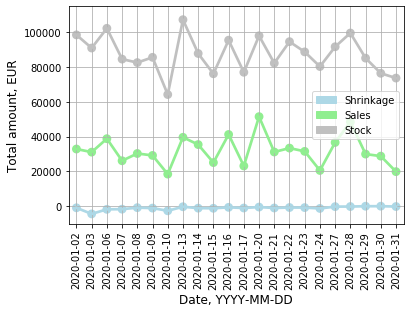

In [65]:
fig, ax = plt.subplots()

sns.pointplot( x=df_by_date.index,y='daily_shrinkage_in_euros',data=df_by_date,color='lightblue')
sns.pointplot( x=df_by_date.index, y='daily_sales_in_euros',data=df_by_date,color='lightgreen')
sns.pointplot( x=df_by_date.index,y='daily_stock_in_euros',data=df_by_date,color='silver')
plt.xlabel('Date, YYYY-MM-DD',fontsize = 12,color='black')
plt.ylabel('Total amount, EUR',fontsize = 12,color='black')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_by_date.index.to_series().dt.strftime("%Y-%m-%d")))
shrinkage_patch = mpatches.Patch(color='lightblue', label='Shrinkage')
stock_patch = mpatches.Patch(color='lightgreen', label='Sales')
sales_patch = mpatches.Patch(color='silver', label='Stock')
plt.legend(handles=[shrinkage_patch, stock_patch, sales_patch])
 
plt.grid()

*Figure 1. Trends of shrinkage, sales and stock in euros between 1st and 31st of January 2020.* 

Figure 1 shows that shrinkage is staying the same low during a month. There is some raise of srinkage 2nd of January, it could be effected by holidays, probably because the store had more products for holidays and it could get spoiled. Also Figure 1 shows sales and stock drop on special dates (10th, 17 th, 24th of January), it is Friday so we are guessing that there is some dependency on weekday.

In [33]:
df_by_date.corr()

,daily_shrinkage_in_euros,daily_sales_in_euros,daily_stock_in_euros
daily_shrinkage_in_euros,1.000000,0.276422,0.152580
daily_sales_in_euros,0.276422,1.000000,0.833311
daily_stock_in_euros,0.152580,0.833311,1.000000


Correlation coefficient between sales and stock in euros by day is +0,83. It mean we have positive correlation, both variables move in the same direction. We can see it on the following plot (Figure 2).

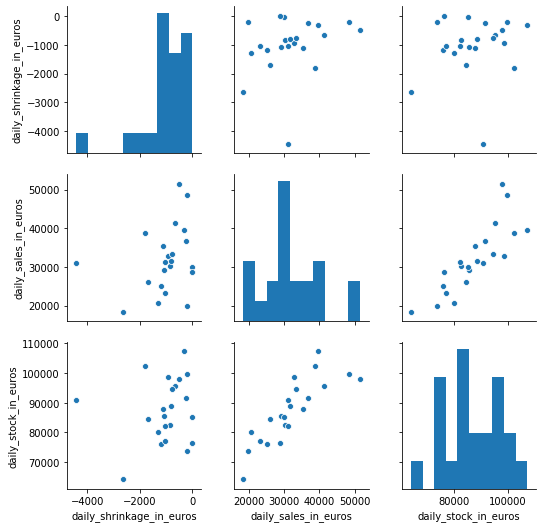

In [34]:
sns.pairplot(df_by_date);

*Figure 2. Visualisation of relationships between all possible pairs of numeric variable groped by day* 

Using the new dataframe grouped by the calender day, we observed strong relationship between sales and stock. Later we check it again on the whole dataset.

#### Explorind weekdays

On the previous step we assumed that sales and stock dependends on weekday. We will explore the assumption more by creating  a new dataframe where the main variables are groupped by a weekday. Since department store is not getting any input on Saturday and Sunday, we do not need these days in our plots.

In [67]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_by_weekday=df.groupby("weekday")["daily_shrinkage_in_euros","daily_stock_in_euros", "daily_sales_in_euros"].sum().reindex(cats)
df_by_weekday.reset_index(inplace=True)
df_by_weekday = df_by_weekday.drop(index=[5, 6])
df_by_weekday["absolute_shrinkage"] = df_by_weekday["daily_shrinkage_in_euros"].apply(abs)
df_by_weekday.sample(2)

,weekday,daily_shrinkage_in_euros,daily_stock_in_euros,daily_sales_in_euros,absolute_shrinkage
2,Wednesday,-2819.0344,338458.907,118766.990,2819.0344
0,Monday,-2863.1071,399185.629,166579.502,2863.1071


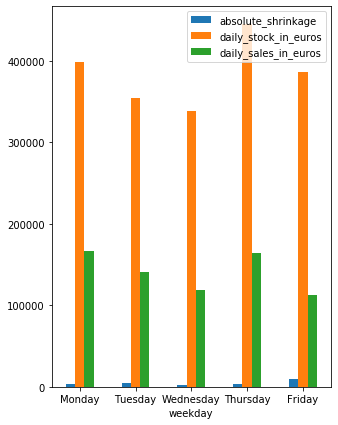

In [66]:
ax = df_by_weekday.plot.bar(x="weekday", y= ["absolute_shrinkage","daily_stock_in_euros", "daily_sales_in_euros"], rot=0, subplots=False, figsize=(5, 7))

*Figure 3. Total amount of shrinkage, sales and stock in euros by weekday* 

Indeed, Figure 3 shows that daily sales on Friday is less then other weekdays. The peak of sales takes place on Mondays and on Thursdays. The stock is clearly peaking on Thursdays. To make a clear vision of sales and shrinkage, we will find a proportion of sales and shrinkage by weekday.

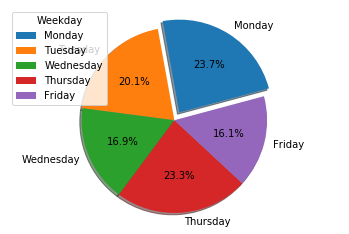

In [68]:
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(df_by_weekday["daily_sales_in_euros"], labels=df_by_weekday['weekday'], autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.axis('equal')
plt.legend(title="Weekday", loc='upper left', labels=df_by_weekday['weekday'], frameon=True, ncol=1)

*Figure 4. Proportion of sales by weekday* 

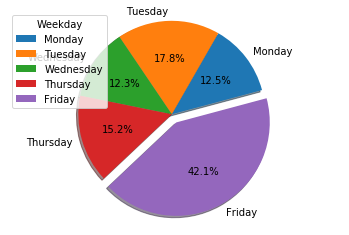

In [69]:
my_explode = (0, 0, 0, 0, 0.1)
plt.pie(df_by_weekday["absolute_shrinkage"], labels=df_by_weekday['weekday'], autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.axis('equal')
plt.legend(title="Weekday", loc='upper left', labels=df_by_weekday['weekday'], frameon=True, ncol=1)

*Figure 5. Proportion of shrinkage by weekday* 

As a result, Figure 4 and Figure 5 shows that there is peak of sales is on Monday and on Thursday and sales drops on Friday and Wednesday. Shrinkage is reaching the highest value on Friday (42,7% out of other weekdays). Shrinkage is stable on the other weekdays 

#### Exploring freshness
Each purchasing area is a part of 2 big categories devided by freshness. We have got an information from "Metro" with following description: 

ACM FLEISCH, ACM FRISCHFISCH, ACM GEMUESE, ACM BLUMEN, ACM OBST belong to "ultrafresh" category (5 purchasing areas) and rest of them are normal fresh. We will make a new column "freshness" which is depending on a given creteria. 

In [39]:
df['freshness'] = 'fresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FLEISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FRISCHFISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM GEMUESE'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM BLUMEN'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM OBST'] = 'ultrafresh'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

Now we have information about each product whether it belongs to fresh or ultrafrech category.

In [40]:
df_freshness = df.groupby("freshness")["daily_shrinkage_in_euros","daily_stock_in_euros", "daily_sales_in_euros"  ].sum().reset_index()
df_freshness

,freshness,daily_shrinkage_in_euros,daily_stock_in_euros,daily_sales_in_euros
0,fresh,-16797.2265,1372994.739,394066.109
1,ultrafresh,-6034.9998,550085.528,309183.872


Let's find proportions of fresh and ultrafresh products in shrinkage in euros, stock in euros and sales in euros.

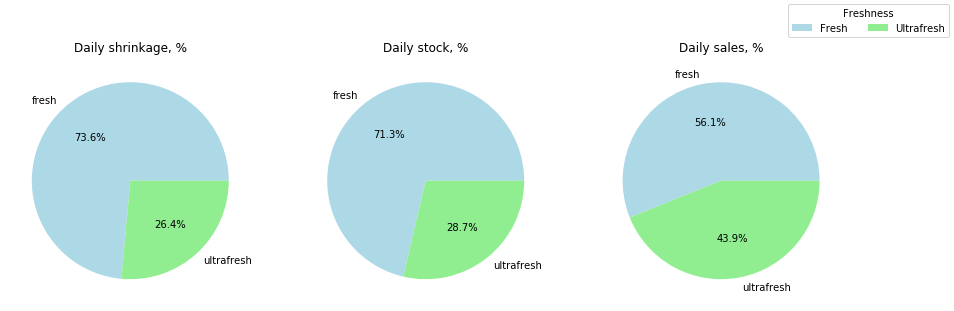

In [70]:
df_pie = pd.DataFrame({'fresh':[16797.2265, 1375354.007, 393883.109],
               'ultrafresh':[6034.9998,552468.146, 308232.872],
               }, index=['daily_shrinkage_in_euros','daily_stock_in_euros','daily_sales_in_euros' ])    
title= ['Daily shrinkage, %','Daily stock, %','Daily sales, %' ]
fig, axs = plt.subplots(nrows=1, ncols=df_pie.index.size, figsize=(15,5))
colors = ["lightblue","lightgreen"]
fig.subplots_adjust(hspace=1.5)


for row in range(df_pie.index.size):
    fig.add_subplot(axs[row] )
    plt.pie(df_pie.loc[df_pie.index[row],:], labels=df_pie.columns, autopct="%1.1f%%", colors=colors)
    axs[row].set_title(title[row])
fig.legend(title="Freshness", loc='upper right', labels=["Fresh", "Ultrafresh"], ncol=2)

*Figure 6. Proportion of Fresh and Ultrafresh products in shrinkage, stock and sales* 

Figure 6 demonstrates, that fresh products take the main part in shrinkage, stock and sales. So following the data for only one month we can conclude, that current depo has less utrafresh product then normal fresh.  We will also check how many unique products has each group. And find out a proportion of it.

In [42]:
df.groupby("freshness")["article_name"].nunique()

freshness
fresh         1026
ultrafresh     716
Name: article_name, dtype: int64

In [43]:
df.groupby("freshness")["article_name"].nunique()/df["article_name"].nunique() * 100

freshness
fresh         58.897819
ultrafresh    41.102181
Name: article_name, dtype: float64

58,9% of unique products belong to normal fresh and 41,1% belongs to ultrafresh, means that number of products takes almost equal parts. 

#### Exploring the top best-selling products 

Let's explore the top 10 of the most sold products by finding percentage of sell each one out of total sum of sells. And comapare to the 10 products which have the highest shrinkage to check if we have any coincidences.

In [44]:
df_by_name_top_sale = df.groupby("article_name")["daily_sales_in_euros","daily_stock_in_euros","daily_shrinkage_in_euros"].sum().reset_index()
df_by_name_top_sale["% out of total sales"]= (df_by_name_top_sale["daily_sales_in_euros"]/df_by_name_top_sale["daily_sales_in_euros"].sum())* 100

In [45]:
df_by_name_top_sale = df_by_name_top_sale.nlargest(10, ["daily_sales_in_euros"])
df_by_name_top_sale.set_index("article_name", inplace=True, drop="true")

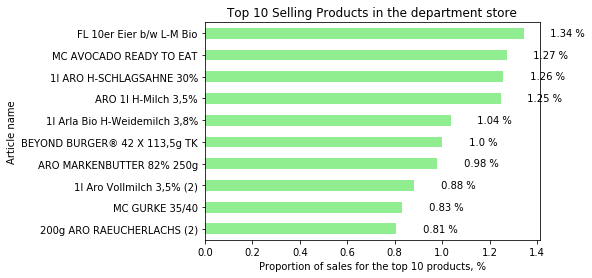

In [46]:
ax = df_by_name_top_sale["% out of total sales"][:10].plot.barh(title="Top 10 Selling Products in the department store",
    color="lightgreen")
plt.xlabel("Proportion of sales for the top 10 products, %");
plt.ylabel("Article name");

for patch in ax.patches:
    ax.text(
        patch.get_width() + 0.1, 
        patch.get_y() + 0.38,
        " {} %".format(patch.get_width().round(2)), 
        fontsize=10,
        color='black'
    )

ax.invert_yaxis()

*Figure 7. Top 10 best-selling Products in the department store for January 2020*

Based on the sales of products across different categories in the department store, the best selling are following products (Figure 7):

1. 10er Eier b/w L-M BIO
2. MC AVICADO 
3. 1L ARO H-SCHLAGSAHNE

These three products make up around 4% of total sells. 

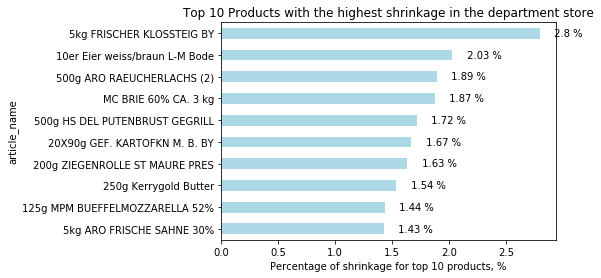

In [47]:
df_by_name_top_shrinkage = df.groupby("article_name")["daily_shrinkage_in_euros"].sum().reset_index()
df_by_name_top_shrinkage["% out of total shrinkage"]= (df_by_name_top_shrinkage["daily_shrinkage_in_euros"]/df_by_name_top_shrinkage["daily_shrinkage_in_euros"].sum())* 100
df_by_name_top_shrinkage = df_by_name_top_shrinkage.nsmallest(10, ["daily_shrinkage_in_euros"])
df_by_name_top_shrinkage.set_index("article_name", inplace=True, drop="true")

ax = df_by_name_top_shrinkage["% out of total shrinkage"][:10].plot.barh(title="Top 10 Products with the highest shrinkage in the department store",
    color="lightblue")
plt.xlabel("Percentage of shrinkage for top 10 products, %");
# create a list to collect the plt.patches data
for patch in ax.patches:
    ax.text(
        patch.get_width() + 0.1, 
        patch.get_y() + 0.38,
        " {} %".format(patch.get_width().round(2)), 
        fontsize=10,
        color='black'
    )

ax.invert_yaxis()

*Figure 8. Top 10 products with the highest shrinkage in the department store for January 2020*

Based on the srinkage of products across different categories in the department store, the most problematic in terms of waste are following products (Figure 8):

1. 5 kg Frischer Klossteig
2. 10er Eier weiss/braun L-M
3. 500g ARO RAEUCHERLACHS

These three products make up around 7% of total shrinkage out of 597 products with shrinkage. There is no coincidence between the best-selling products and its shrinkage. 

As a suggestion, "Metro" could check the reasons of such a high shrinkage and if these products worth to have in a store.

#### Exploring the main category (purchasing area)

In [48]:
df["purchasing_area_description"].unique().tolist()

['ACM FLEISCH',
 'ACM BACKWAREN',
 'ACM FRISCHFISCH',
 'ACM MOLKEREIPRODUKTE',
 'ACM KAESE',
 'ACM FEINKOST',
 'ACM GOURVENIENCE',
 'ACM WURST',
 'ACM OBST',
 'ACM GEMUESE']

We have got 10 purchasing areas to explore. AMC BLUMEN has no any record. During this step of exploration we will find the purchasing areas with the highest and lowest: 
    - shrinkage;
    - sales;
    - stock.

In [49]:
df_areas = df.groupby("purchasing_area_description")["daily_sales_in_euros","daily_stock_in_euros","daily_shrinkage_in_euros"].sum().drop(index="ACM BLUMEN").reset_index()
# df_areas = df_areas.drop([df_areas["purchasing_area_description"] == "ACM BLUMEN"])
df_areas

,purchasing_area_description,daily_sales_in_euros,daily_stock_in_euros,daily_shrinkage_in_euros
0,ACM BACKWAREN,14102.000,55595.000,-199.9313
1,ACM FEINKOST,25170.000,89487.273,-3371.1331
2,ACM FLEISCH,123057.865,178812.857,-2184.6305
3,ACM FRISCHFISCH,28823.007,60731.177,-1256.6433
4,ACM GEMUESE,102817.000,192598.936,-2363.5960
5,ACM GOURVENIENCE,2502.810,23.000,0.0000
6,ACM KAESE,125558.000,551416.128,-3716.3172
7,ACM MOLKEREIPRODUKTE,164432.299,440071.845,-4353.7868
8,ACM OBST,54486.000,117942.558,-230.1300
9,ACM WURST,62301.000,236401.493,-5156.0581


Now we can explore purchasing areas in depth.

Text(0.5, 1.0, 'Shrinkage in EUR by purchasing areas')

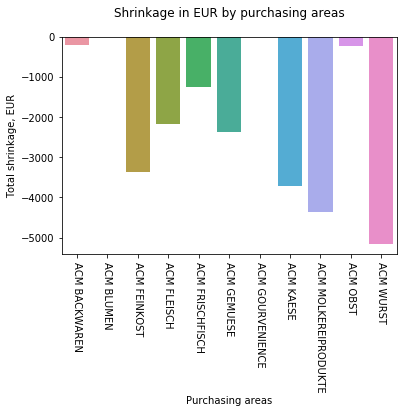

In [50]:
sns.barplot(data = df_areas, x = "purchasing_area_description", y = "daily_shrinkage_in_euros")
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas");
plt.ylabel("Total shrinkage, EUR");
plt.title('Shrinkage in EUR by purchasing areas', pad=20,color="black")

*Figure 9. Total shrinkage in euros by purchasing area*

Following Figure 9, areas with the highest srinkage: ACM WURST, ACM MOLKEREIPRODUKTE and ACM KAESE, areas with the lowest shrinkage is ACM OBST (fruits) and ACM BACKWAREN (bread). 
ACM  GOURVENIENCE does not have shrinkage. It is the own brand of "Metro", so it could be that the shrinkage counts in a different way.

Text(0.5, 1.0, 'Sales in EUR by purchasing areas')

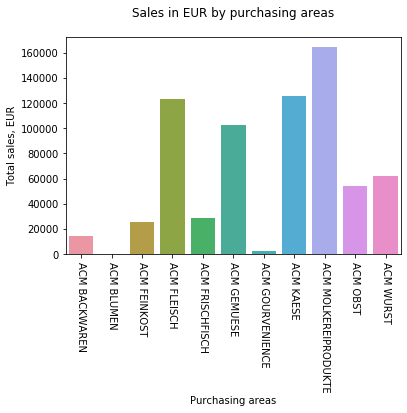

In [51]:
sns.barplot(data = df_areas, x = "purchasing_area_description", y = "daily_sales_in_euros")
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas");
plt.ylabel("Total sales, EUR");
plt.title('Sales in EUR by purchasing areas', pad=20,color="black")

*Figure 10. Total sales in euros by purchasing area*

Text(0.5, 1.0, 'Stock in EUR by purchasing areas')

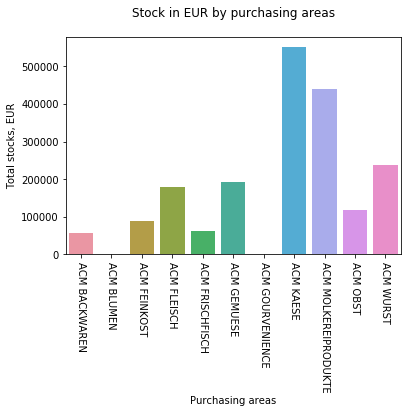

In [52]:
sns.barplot(data = df_areas, x = "purchasing_area_description", y = "daily_stock_in_euros")
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas");
plt.ylabel("Total stocks, EUR");
plt.title('Stock in EUR by purchasing areas', pad=20,color="black")

*Figure 11. Total stock in euros by purchasing area*

Following Figure 10, the areas with the highest sales: ACM MOLKEREIPRODUKTE, ACM KAESE and ACM FLEISCH. Following Figure 11, the areas with the highest stock: ACM MOLKEREIPRODUKTE, ACM KAESE and ACM GEMUSE.

So far, we do not observe any dependency between sales and shrinkage or stock and shrinkage.

(0, 400)

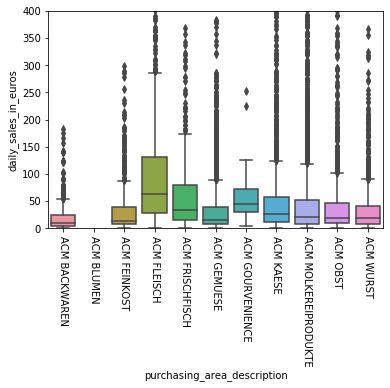

In [71]:
#todo
sns.boxplot(x = df["purchasing_area_description"], y = df["daily_sales_in_euros"])
plt.xticks(rotation=-90)
plt.ylim(0,400)

*Figure 12. Boxplot*

Median is the best average mesure for our data set since we have a lot of ouliers, after research, we came to decision that it is usual behavior for real life data to have such an amount of outlires. We can infer from the Figure 12 that the amount of total sales is higher for ACM FLEISCH category. Median price for Fleish is 63 and it is the highest out of categies. Also Fleish has the biggest normalised max values. 

In [54]:
df.groupby("purchasing_area_description")["daily_sales_in_euros"].max()

purchasing_area_description
ACM BACKWAREN           183.0
ACM BLUMEN                NaN
ACM FEINKOST            620.0
ACM FLEISCH             989.0
ACM FRISCHFISCH         675.0
ACM GEMUESE             815.0
ACM GOURVENIENCE        253.0
ACM KAESE               748.0
ACM MOLKEREIPRODUKTE    993.0
ACM OBST                681.0
ACM WURST               910.0
Name: daily_sales_in_euros, dtype: float64

In [55]:
## TODO
df_max= df.groupby("purchasing_area_description")["daily_sales_in_euros"].max().reset_index()
df_max

,purchasing_area_description,daily_sales_in_euros
0,ACM BACKWAREN,183.0
1,ACM BLUMEN,NaN
2,ACM FEINKOST,620.0
3,ACM FLEISCH,989.0
4,ACM FRISCHFISCH,675.0
5,ACM GEMUESE,815.0
6,ACM GOURVENIENCE,253.0
7,ACM KAESE,748.0
8,ACM MOLKEREIPRODUKTE,993.0
9,ACM OBST,681.0


#### Finding correlation

The last step is to make an conclusion about correlation between variables.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

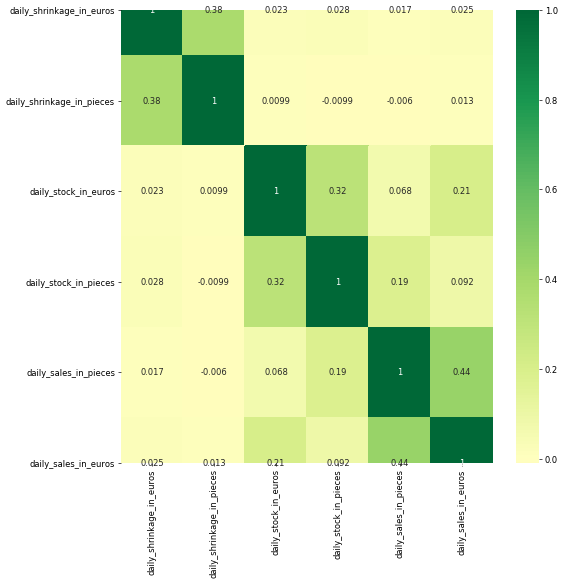

In [72]:
plt.figure(figsize=(10,10), dpi= 60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

*Figure 13. The correllogram with correlation coefficients of all possible pairs of numeric variable*

Figure 13 doesn’t indicate that there’s any strong correlation, because correlation coefficient of all possible pairs of numeric variable less then 0.30. However there is a weak uphill (positive) linear relationship + 0.2 between daily sales in euros and daily stock in euros. For another pairs there is a very weak or no relationship at all exists, so calculating the correlation doesn’t make sense because correlation only applies to linear relationships.

The next steps:
- plot linear relationship between daily sales in euros and daily stock in euros
- explore theoretical distribution which fits our data set

Text(0.5, 1, 'Joint plot for correlation between stock and sales')

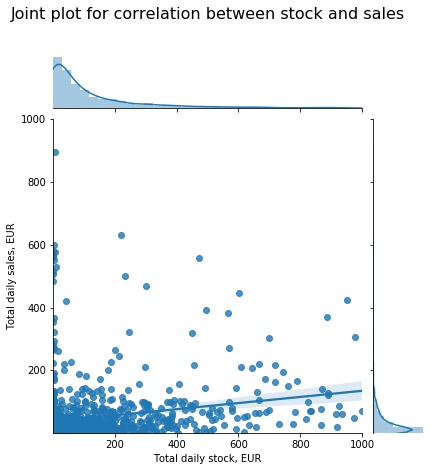

In [57]:
sns.jointplot(x="daily_stock_in_euros" , y="daily_sales_in_euros",kind="reg", data=df.sample(1000));
plt.xlim([1,1000]) 
plt.ylim([1,1000])
plt.xlabel("Total daily stock, EUR");
plt.ylabel("Total daily sales, EUR");
plt.title('Joint plot for correlation between stock and sales', pad=100, color="black", fontsize=16)

*Figure 14. Visualisation of relationship between sales and stock and the regression line that best fits the data points.*

The histogram on the top of Figure 14 shows the distribution of the sales variable. The most frequent number of sales lays in between 1 to 200 euros. Distribution is positively skewed(mean = 49 is greater than the median = 21).
The histogram to the right of Figure 14 shows the distribution of the stock variable, distribution of it is similar to the sales distribution, positively skewed(mean = 134 is greater than the median = 62).

As the last step of the report, let's find what theoretical distribution is the most suitable to describe our sales data? First, let's test sales distributions with a python method and find which distribution fits.

In [58]:
data = df["daily_sales_in_euros"]
distributions = [st.alpha,st.beta,st.gamma,st.laplace,st.lognorm,st.pearson3,st.norm]
mles = []
for distribution in distributions:
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)
results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print("Best fit for sales variable reached using {}".format(best_fit[0].name, best_fit[1]))

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Best fit for sales variable reached using lognorm


Logarithm of random sales variables is normally distributed. We have skewed distributions with low mean values, large variance, and all-positive values. Now, we can plot distribution.

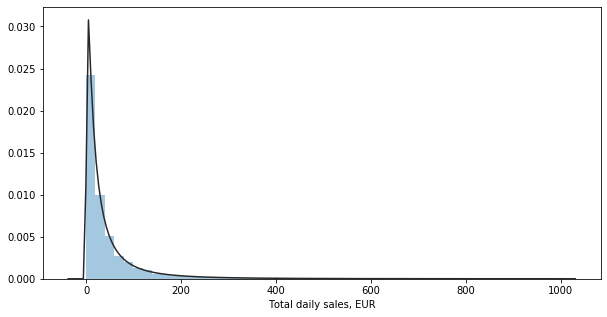

In [59]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df["daily_sales_in_euros"], fit=st.lognorm, kde=False)
plt.xlabel("Total daily sales, EUR");

*Figure 15. Visualizing sales lognorm distribution.*

#TODO
Let's check out a sample of aour data for shrinkage.

In [60]:
parameter = df["daily_shrinkage_in_euros"].abs().max()
sample = df["daily_shrinkage_in_euros"].sample(100, random_state=1)
statistic = sample.abs().max()
sampling_error = parameter - statistic
print("Our parameter is " + str(parameter) + " our statatistic is  " + str(statistic) + " sampling error " + str(sampling_error))

Our parameter is 638.82 our statatistic is  38.8058 sampling error 600.0142000000001


Our data is very diverse so we should expect a large sampling error (a large discrepancy between our sample's statistic and the population's parameter. 


* calculate the minimum and maximum value from the sequence of values we passed in
* create 10 bins of equal length that span the range from the minimum to the maximum value
* group unique values into the bins
* sum up the associated unique values
* generate a bar for the frequency sum for each bin

From the histograms, we can make the following observations:

* Around 50% of shrinkage take betwenn the ... to ... range
* Around 75% of shrinkage take betwenn the ... to ... range
* Around 90% of shrinkage take betwenn the ... to ... range

### Conclusion
#### What has been done
    1. Exploring trends of sales, stock and shrinkage.
    2. Exploring freshness and discovering that fresh prosucts take the main part in shrinkage, stock_in_euros and sales. 
    3. Found top 10 sold products and top 10 products with the highest shrinkage
    4. Exploring purchasing areas and finding areas with the most srinkage with the least shrinkage is ACM OBST (fruits) and ACM BACKWAREN (bread).
    5. Exploring correlation metric between all possible pairs of numeric variables, We did not find any strong correlation. However we could explore a weak uphill (positive) linear relationship + 0.2 between daily sales in euros and daily stock in euros.
    6. Found the most suitable distribution for sales variable.

It has been shown .... that....
Here are the take home points from the report:
- working with missing value depends on business logic of the variales, could be done through under sometimes it is impossible to use theoretical methods and 
- real data could have a lot of outliers,
- fitting into the model
- no correlation is ok

How to tacle initial problem?